In [59]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import fbprophet
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from matplotlib import pyplot as plt

           ds       y
0  1992-01-01  146376
1  1992-02-01  147079
2  1992-03-01  159336
3  1992-04-01  163669
4  1992-05-01  170068
             ds       y
288  2016-01-01  400928
289  2016-02-01  413554
290  2016-03-01  460093
291  2016-04-01  450935
292  2016-05-01  471421


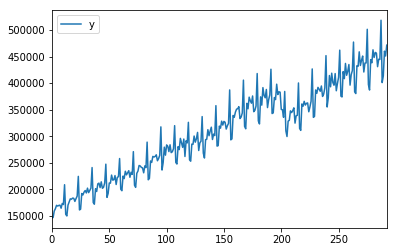

In [57]:
df=pd.read_csv(r'C:\Users\Nikkitha\Desktop\Time-Series-Forecasting\example_retail_sales.csv')
print(df.head())
print(df.tail())
df.plot()

To achieve approximation of normality in the dataset, a box-cox transform can be applied. This is essentially a power transformation where each value in the column 'y' s raised to a certain coefficient "lambda". More precisely, the box-cox transform for each value in column 'y' is defined in the following way:
\begin{cases}{\dfrac {y_{i}^{\lambda }-1}{\lambda (\operatorname {GM} (y))^{\lambda -1}}},&{\text{if }}\lambda \neq 0\\[12pt]\operatorname {GM} (y)\ln {y_{i}},&{\text{if }}\lambda =0\end{cases}

Here, I use the box-cox function from scipy. Specific value for "lambda" can be specified. If not, scipy automatically picks a value that should provide the best approximation for normality in a given data set.

In [47]:
#applying box-cox
df['y'], lam=boxcox(df['y'])

In [48]:
print(lam)

0.7843824615332755


In [49]:
df.head()

,ds,y
0,1992-01-01,14359.441360
1,1992-02-01,14413.512427
2,1992-03-01,15347.577739
3,1992-04-01,15674.028221
4,1992-05-01,16152.750435


The values in column 'y' after the box-cox transform appear to be lower by a factor of 10, than the original 'y' values.

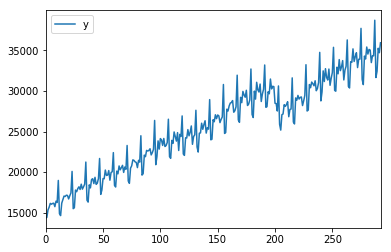

In [50]:
df.plot()

Forecasting

In [52]:
m=fbprophet.Prophet(weekly_seasonality=True, daily_seasonality=True)
m.fit(df)

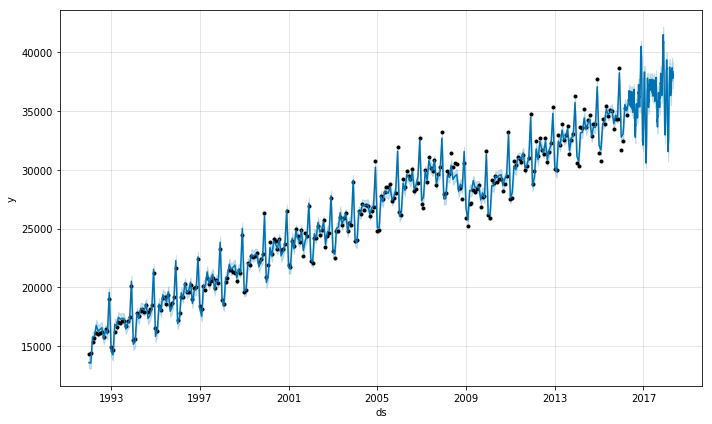

In [63]:
future=m.make_future_dataframe(periods=730)
forecast=m.predict(future)
m.plot(forecast);

The forecast for a period of 2 years (2017 and 2018) is shown towards the end of the curve. The black dots are esentially the "outliers" (points that were ignored while approximating the trend from the original dataset).

Prophet also allows me to visualize some additional insights from the forecasting process.

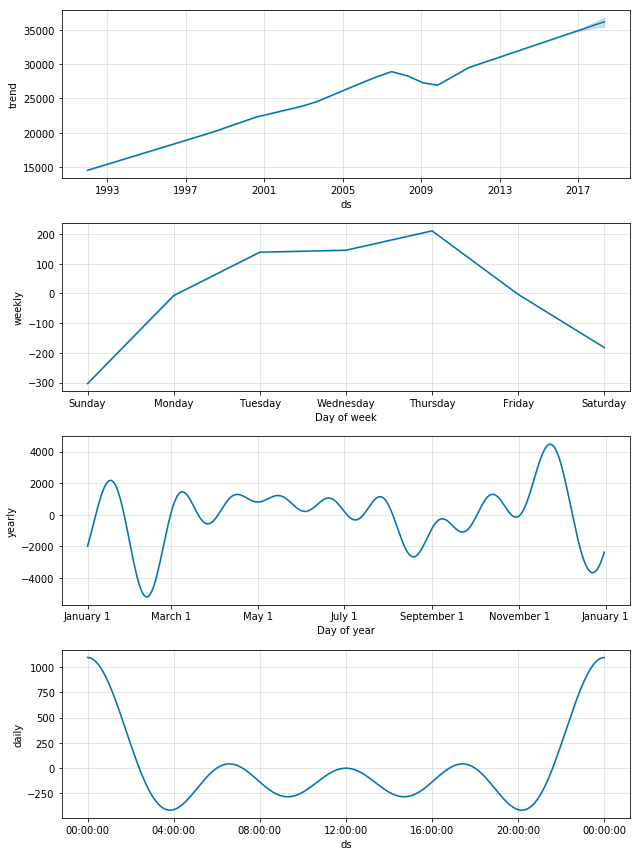

In [65]:
m.plot_components(forecast);

The overall trend indicated the general direction in which the sales move.
The "weekly component" trend indicates higher sales on Thursday compared to other days. This perhaps can be attributed to additional working hours of retail stores on that day.
The "daily component" indicates higher sales in the beginning and end of each working day.
The "yearly component" indicates higher sales in the run-up to the festive season in December.

In [66]:
#list column names in forecast dataframe.
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 22 columns):
ds                            1023 non-null datetime64[ns]
trend                         1023 non-null float64
yhat_lower                    1023 non-null float64
yhat_upper                    1023 non-null float64
trend_lower                   1023 non-null float64
trend_upper                   1023 non-null float64
additive_terms                1023 non-null float64
additive_terms_lower          1023 non-null float64
additive_terms_upper          1023 non-null float64
daily                         1023 non-null float64
daily_lower                   1023 non-null float64
daily_upper                   1023 non-null float64
weekly                        1023 non-null float64
weekly_lower                  1023 non-null float64
weekly_upper                  1023 non-null float64
yearly                        1023 non-null float64
yearly_lower                  1023 non-null float64
ye

The forecasted dataframe can be rescaled to original sales values by inversing the box-cox transform. A simple helper function is applied directly on the dataframe to achieve this.

In [67]:
#applying inverse
forecast[['yhat','yhat_upper','yhat_lower']]=forecast[['yhat','yhat_upper','yhat_lower']].apply(lambda x: inv_boxcox(x,lam))

Some original and the forecasted values are visualized below. 'y' axis is sales. 'x' axis is days.

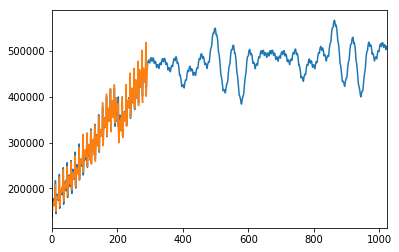

In [73]:
forecast['yhat'].plot();
df['y'].plot();